The dimension of $X_1$ and $X_2$ is $100\times400$.

In [1]:
library(plyr)
library(ggplot2)

In [2]:
load('summary.Rdata')
adaptive = ddply(summary_adaptive_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage))
oracle = ddply(summary_oracle_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage))
Stein_vol = ddply(summary_volume_stein_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Stein_radius = ddply(summary_radius_stein_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Lasso_vol = ddply(summary_volume_lasso_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Lasso_radius = ddply(summary_radius_lasso_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))

theme_settings = theme_bw() + 
  theme(panel.grid = element_blank(), 
        text=element_text(size=15), 
        plot.title = element_text(hjust = 0.5),
        legend.background=element_blank(),
        legend.key=element_blank(), 
        legend.key.height=unit(1, 'cm'),
        strip.background = element_blank(),
        legend.position = 'top')
dataset1 = rbind(adaptive, oracle, Stein_vol)
Stein_vol['c'] = 'vol'
Stein_radius['c'] = 'radius'
Lasso_vol['c'] = 'vol'
Lasso_radius['c'] = 'radius'
dataset2 = rbind(Stein_vol, Stein_radius, Lasso_vol, Lasso_radius)

# Compare adaptive, oracle Lasso and two step Stein, the last two of which pick up $c_1$ and $c_2$ by minimizing volume. 

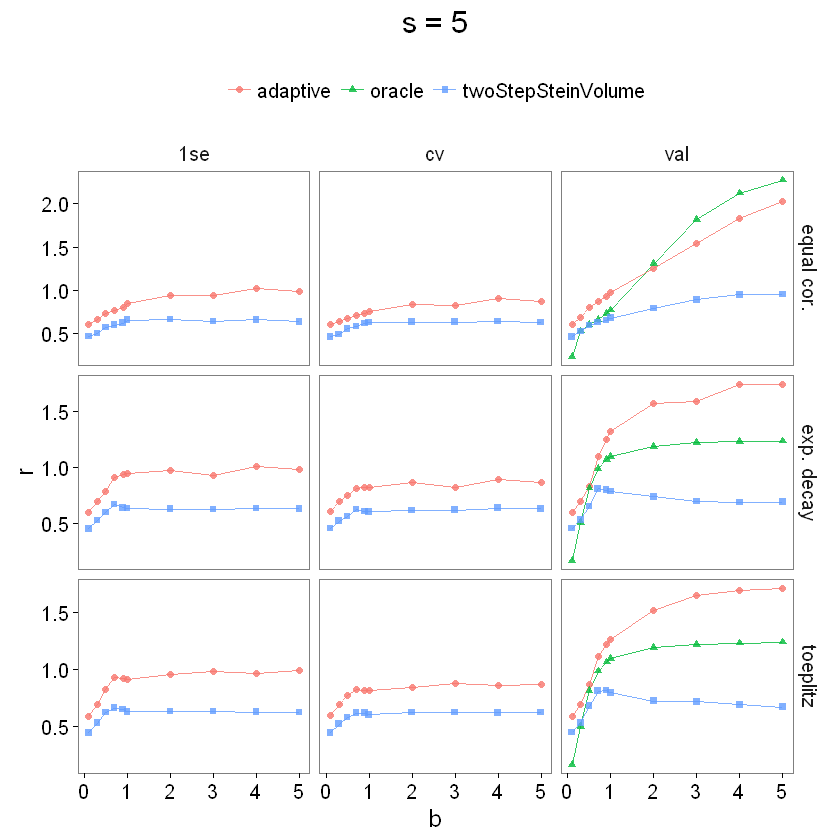

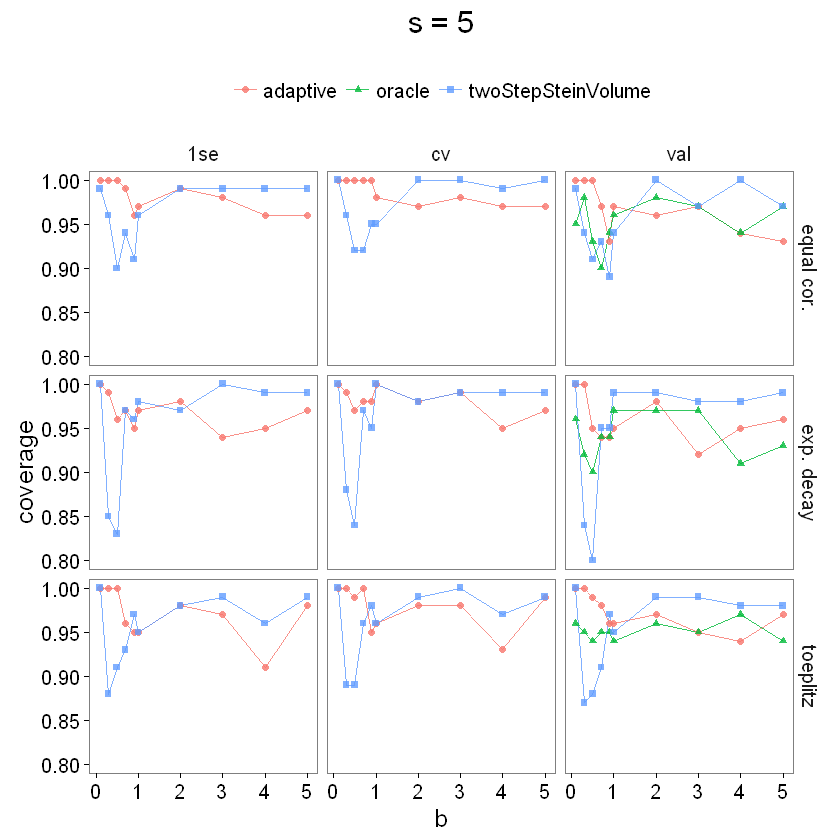

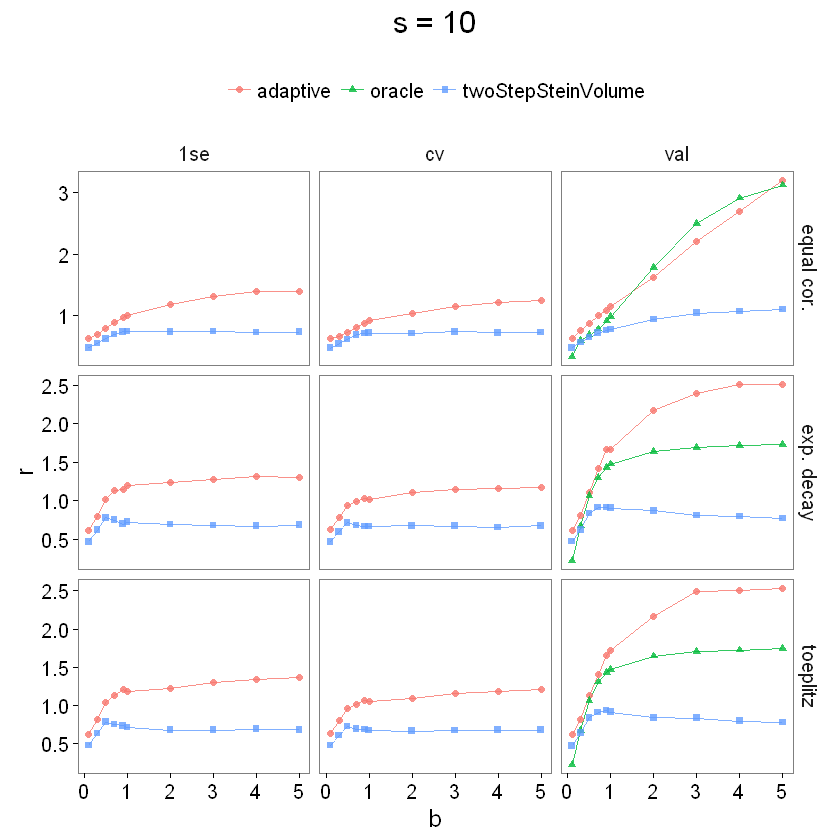

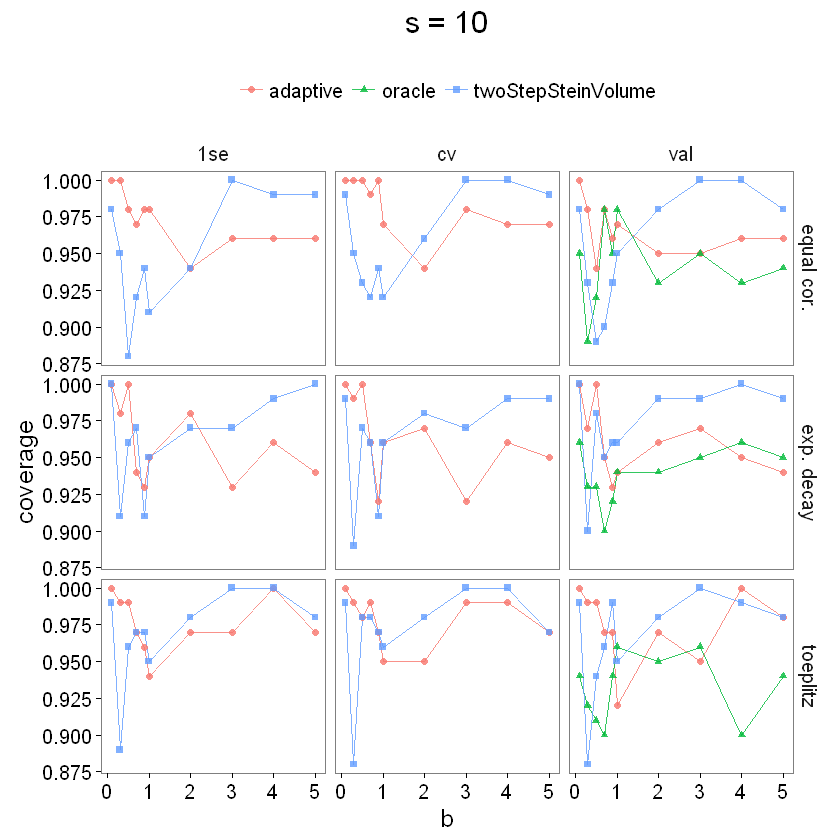

In [3]:
ggplot(data = dataset1[dataset1$s == 5, ], aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ggtitle("s = 5") + 
  theme_settings
ggplot(data = dataset1[dataset1$s == 5, ], aes(x = b, y = coverage, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="fixed") + 
  ggtitle("s = 5") + 
  theme_settings

ggplot(data = dataset1[dataset1$s == 10, ], aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ggtitle("s = 10") + 
  theme_settings
#ggsave('stein_radis.pdf', width = 6.67, height = 6.67, units = 'in')

ggplot(data = dataset1[dataset1$s == 10, ], aes(x = b, y = coverage, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="fixed") + 
  ggtitle("s = 10") + 
  theme_settings
#ggsave('stein_coverage.pdf', width = 6.67, height = 6.67, units = 'in')

# Save graphs

# Compare two-step Stein and two-step Lasso

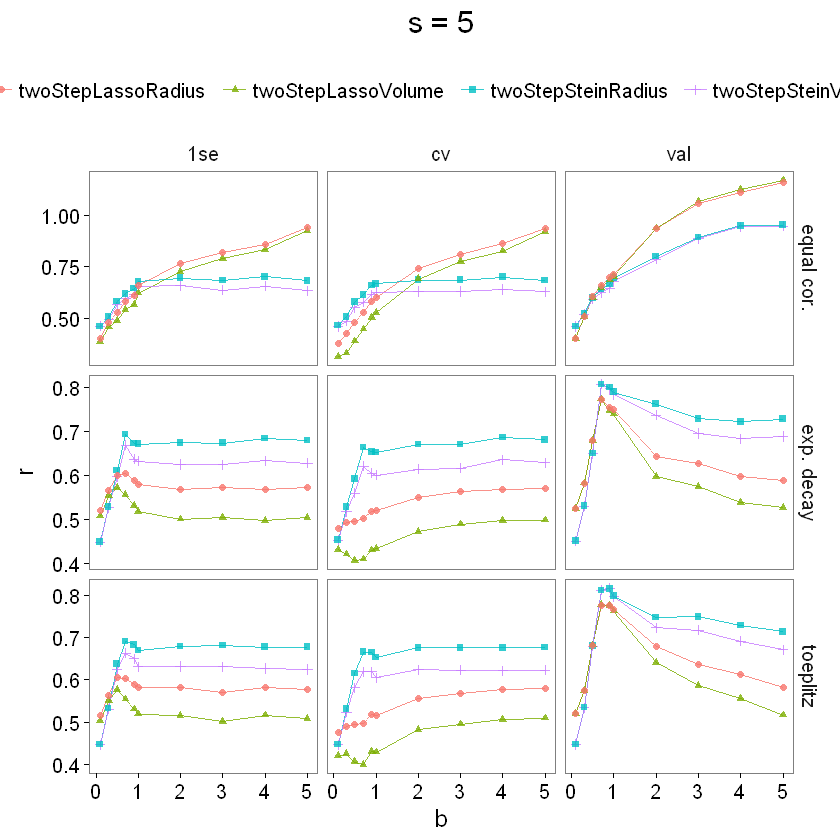

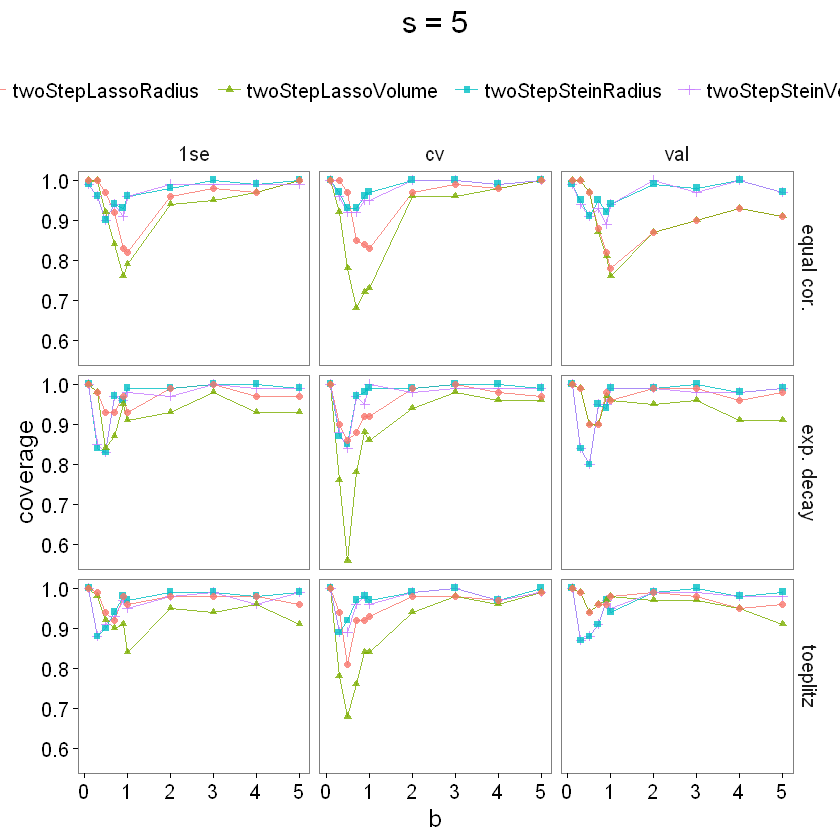

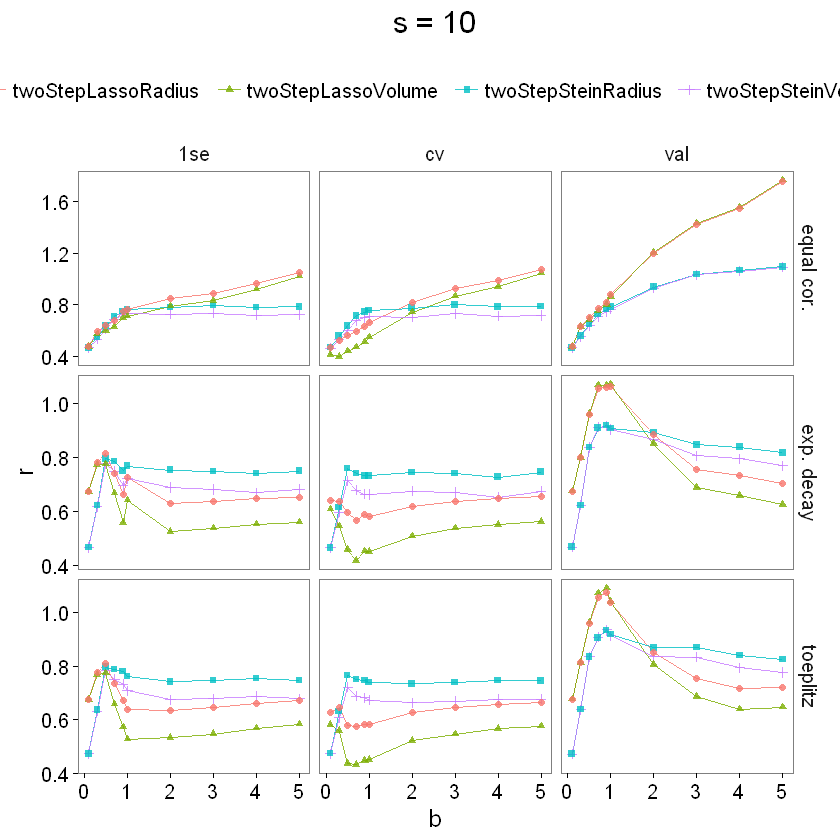

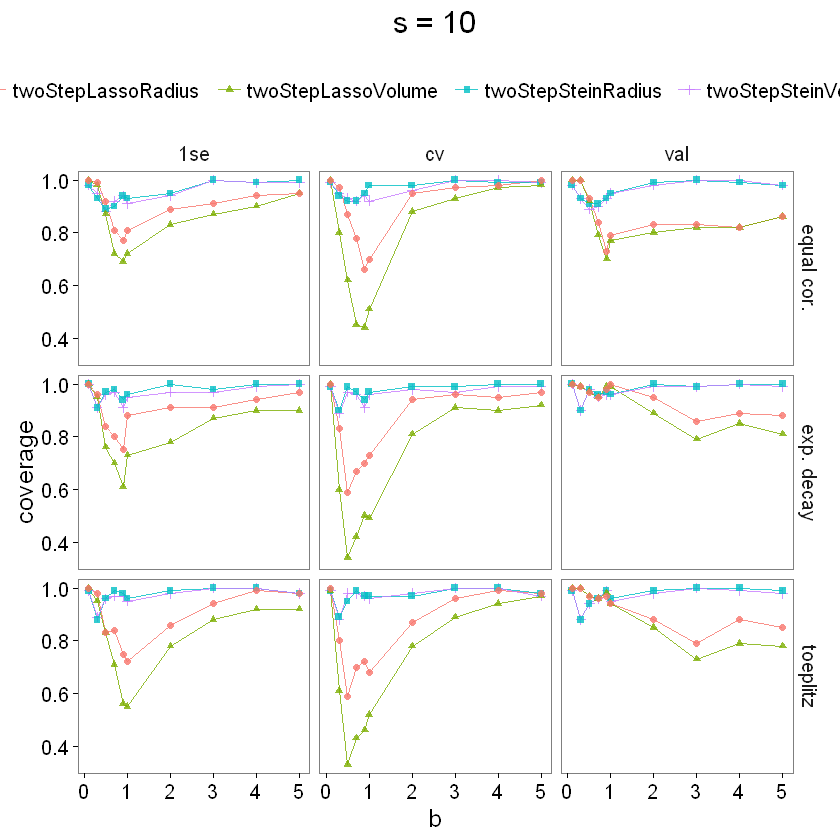

In [4]:
ggplot(data = dataset2[dataset2$s == 5, ], aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ggtitle("s = 5") + 
  theme_settings
#ggsave('lasso_radis.pdf', width = 6.67, height = 6.67, units = 'in')

ggplot(data = dataset2[dataset2$s == 5, ], aes(x = b, y = coverage, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="fixed") + 
  ggtitle("s = 5") + 
  theme_settings

ggplot(data = dataset2[dataset2$s == 10, ], aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ggtitle("s = 10") + 
  theme_settings
#ggsave('lasso_radis.pdf', width = 6.67, height = 6.67, units = 'in')

ggplot(data = dataset2[dataset2$s == 10, ], aes(x = b, y = coverage, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="fixed") + 
  ggtitle("s = 10") + 
  theme_settings
#ggsave('lasso_coverage.pdf', width = 6.67, height = 6.67, units = 'in')

# $\beta$ contains both $5$ strong signals and $5$ weak signals

In [5]:

theme_settings = theme_bw() + 
  theme(panel.grid = element_blank(), 
        text=element_text(size=15), 
        plot.title = element_text(hjust = 0.5),
        legend.background=element_blank(),
        legend.key=element_blank(), 
        legend.key.height=unit(1, 'cm'),
        strip.background = element_blank(),
        legend.position = 'top')


In [6]:
colnames(summary_volume_stein_multiple)

[1] "coverage" "r_s"      "r_w"      "k"        "logVol"   "tau"     
 [7] "lam1Type" "bs"       "bw"       "method"   "design"

In [7]:
adaptive_m = ddply(summary_adaptive_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage))
oracle_m = ddply(summary_oracle_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage))
Stein_vol_m = ddply(summary_volume_stein_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Stein_radius_m = ddply(summary_radius_stein_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Lasso_vol_m = ddply(summary_volume_lasso_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Lasso_radius_m = ddply(summary_radius_lasso_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))

dataset3 = rbind(adaptive_m, oracle_m, Stein_vol_m)
Stein_vol_m['c'] = 'vol'
Stein_radius_m['c'] = 'radius'
Lasso_vol_m['c'] = 'vol'
Lasso_radius_m['c'] = 'radius'
dataset4 = rbind(Stein_vol_m, Stein_radius_m, Lasso_vol_m, Lasso_radius_m)

# Compare adaptive, oracle Lasso and  two step Stein.

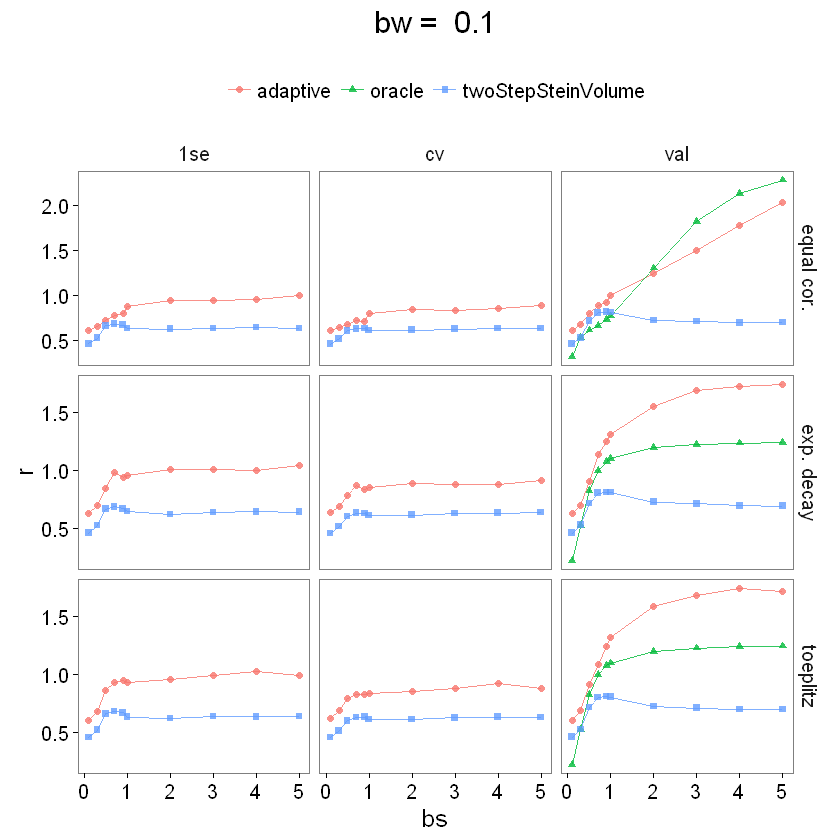

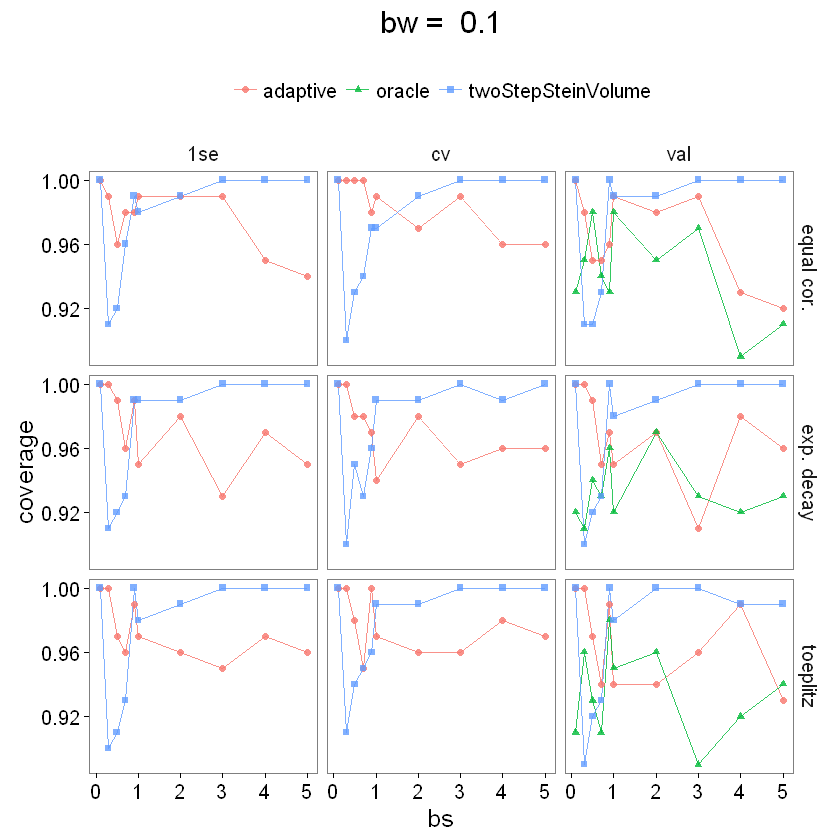

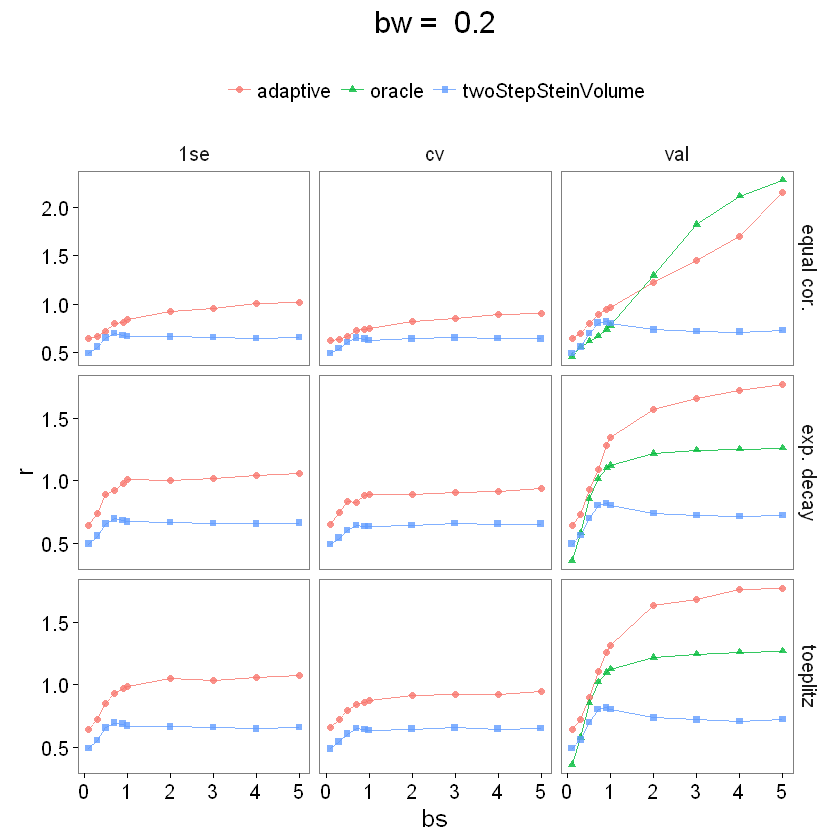

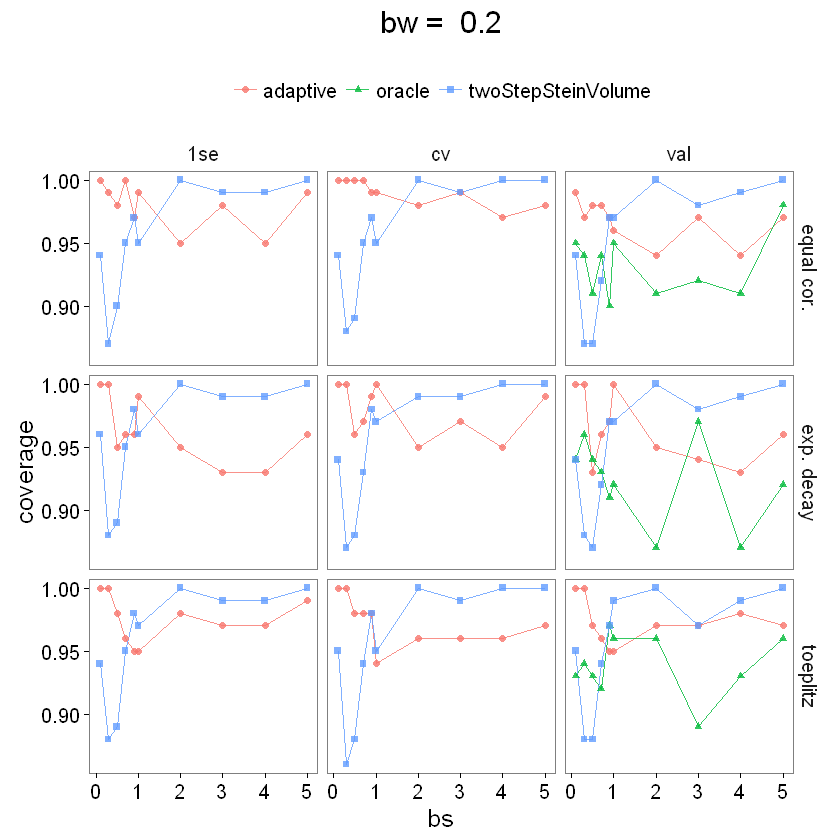

In [8]:
bw = 0.1
ggplot(data = dataset3[dataset3$bw == bw, ], aes(x = bs, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ggtitle(paste("bw = ", bw)) + 
  theme_settings
#ggsave('stein_radis2.pdf', width = 6.67, height = 6.67, units = 'in')

ggplot(data = dataset3[dataset3$bw == bw, ], aes(x = bs, y = coverage, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="fixed") + 
  ggtitle(paste("bw = ", bw)) + 
  theme_settings 
#ggsave('stein_coverage2.pdf', width = 6.67, height = 6.67, units = 'in')

bw = 0.2
ggplot(data = dataset3[dataset3$bw == bw, ], aes(x = bs, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ggtitle(paste("bw = ", bw)) + 
  theme_settings
#ggsave('stein_radis2.pdf', width = 6.67, height = 6.67, units = 'in')

ggplot(data = dataset3[dataset3$bw == bw, ], aes(x = bs, y = coverage, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="fixed") + 
  ggtitle(paste("bw = ", bw)) + 
  theme_settings 
#ggsave('stein_coverage2.pdf', width = 6.67, height = 6.67, units = 'in')

# Compare two-step Stein and two-step Lasso

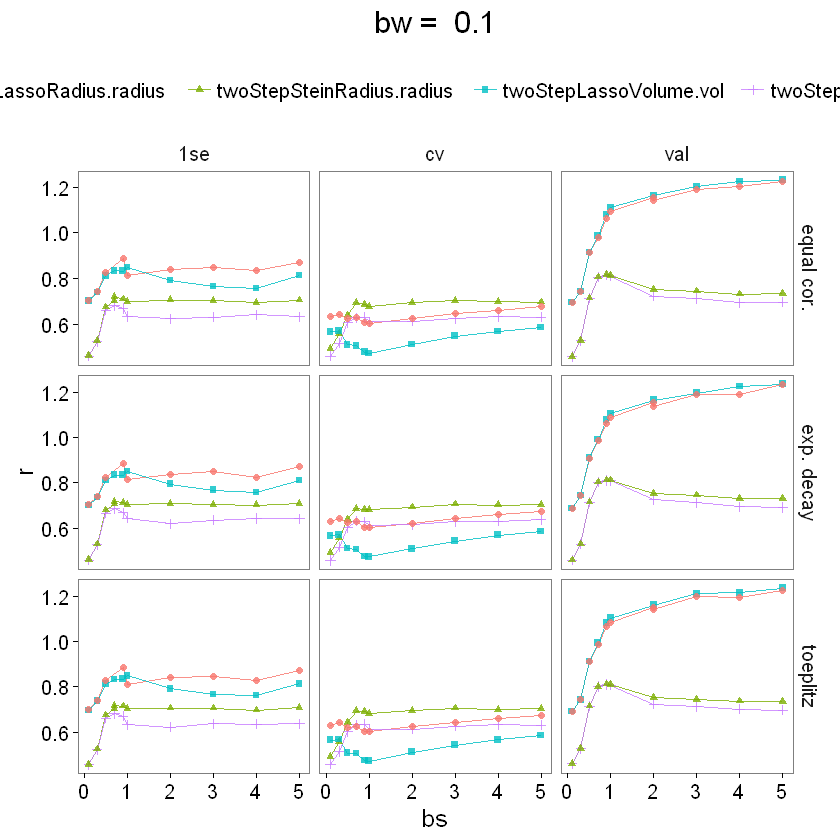

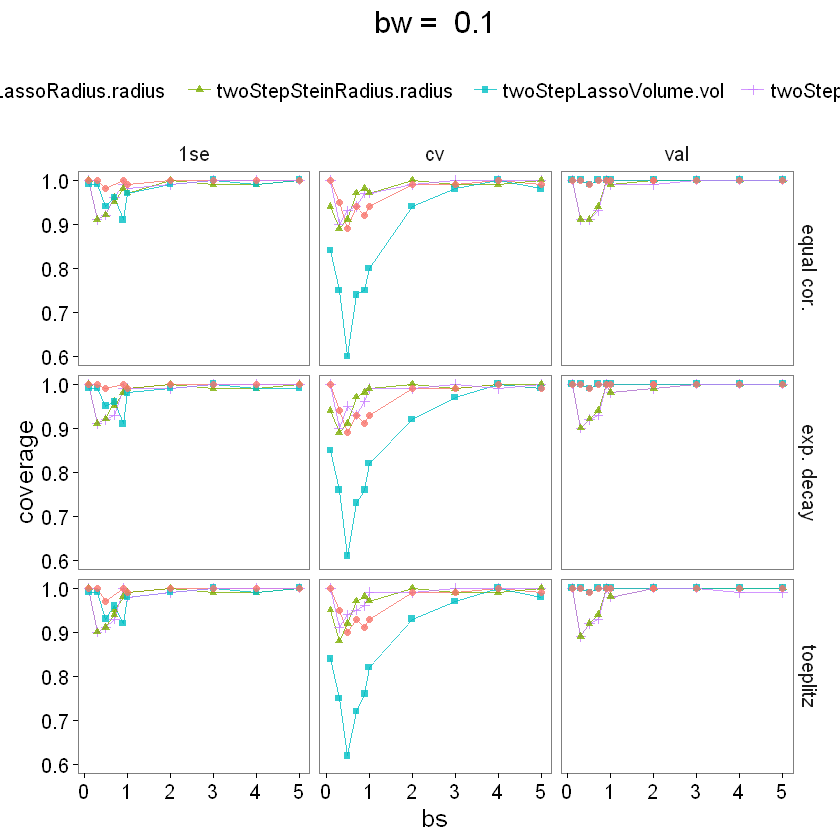

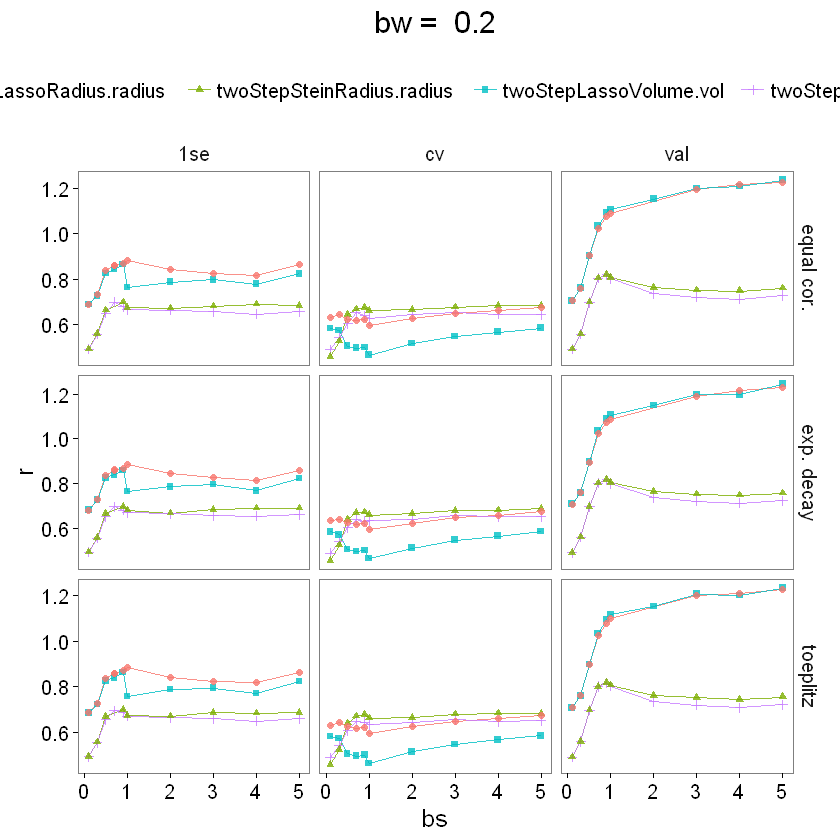

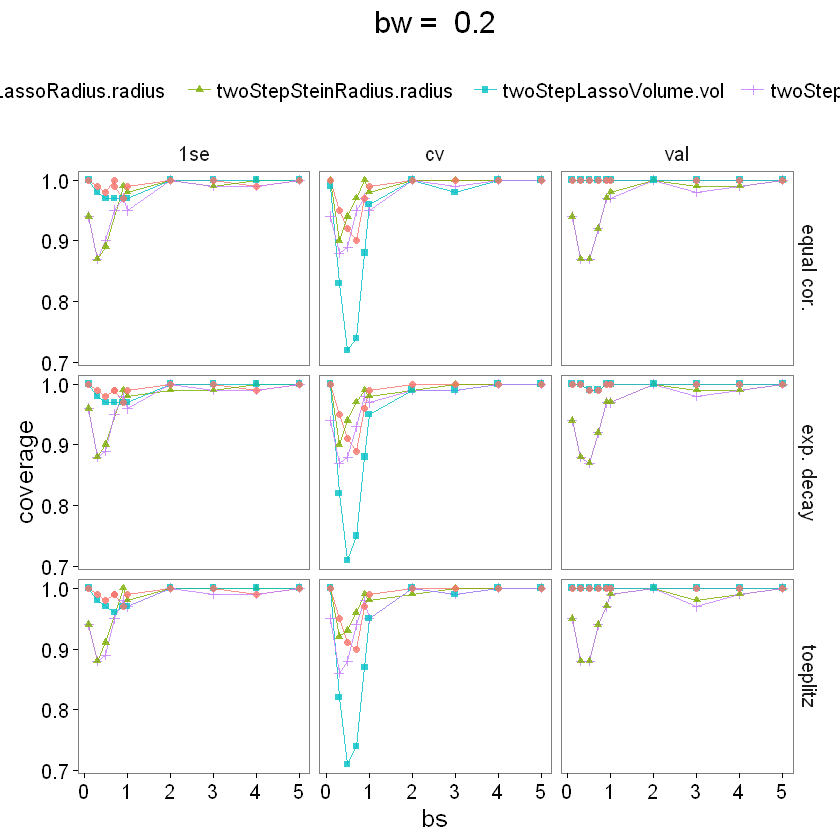

In [9]:
bw = 0.1
ggplot(data = dataset4[dataset3$bw == bw, ], aes(x = bs, y = r, color = interaction(method, c), shape = interaction(method, c))) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ggtitle(paste("bw = ", bw)) + 
  theme_settings
#ggsave('stein_radis2.pdf', width = 6.67, height = 6.67, units = 'in')

ggplot(data = dataset4[dataset3$bw == bw, ], aes(x = bs, y = coverage, color = interaction(method, c), shape = interaction(method, c))) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="fixed") + 
  ggtitle(paste("bw = ", bw)) + 
  theme_settings 
#ggsave('stein_coverage2.pdf', width = 6.67, height = 6.67, units = 'in')

bw = 0.2
ggplot(data = dataset4[dataset3$bw == bw, ], aes(x = bs, y = r, color = interaction(method, c), shape = interaction(method, c))) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ggtitle(paste("bw = ", bw)) + 
  theme_settings
#ggsave('stein_radis2.pdf', width = 6.67, height = 6.67, units = 'in')

ggplot(data = dataset4[dataset3$bw == bw, ], aes(x = bs, y = coverage, color = interaction(method, c), shape = interaction(method, c))) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="fixed") + 
  ggtitle(paste("bw = ", bw)) + 
  theme_settings 
#ggsave('stein_coverage2.pdf', width = 6.67, height = 6.67, units = 'in')

In [10]:
#ggplot(data=Stein_vol_combined) + geom_histogram(aes(x=coverage), bins=30)

In [11]:
#ggplot(data=Stein_vol) + geom_histogram(aes(x=coverage), bins=30)